# **Exploratory Data Analysis & Preprocessing**

Download MIT-BIH Arrhythmia Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

100%|██████████| 98.8M/98.8M [00:00<00:00, 267MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1


In [ ]:
import os

data_path = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1"
print(os.listdir(data_path))

['ptbdb_normal.csv', 'ptbdb_abnormal.csv', 'mitbih_train.csv', 'mitbih_test.csv']


Load training and test set ECG signal samples in dataframes

In [85]:
import pandas as pd

X_train = pd.read_csv(f"{data_path}/mitbih_train.csv",header=None,usecols=range(187))
y_train = pd.read_csv(f"{data_path}/mitbih_train.csv",header=None,usecols=[187]).iloc[:,0]

X_train.shape

(87554, 187)

In [86]:
X_test = pd.read_csv(f"{data_path}/mitbih_test.csv",header=None,usecols=range(187))
y_test = pd.read_csv(f"{data_path}/mitbih_test.csv",header=None,usecols=[187]).iloc[:,0]

X_test.shape

(21892, 187)

In [87]:
# Initial training set samples
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# Test set samples
X_test

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plot 10 ECG signal instances for each case of beat. Since each recording has 187 samples and the sampling rate is equal to 125 Hz,  
then the duration in seconds is given by:

$$
\text{seconds} =
\frac{\text{number of samples}}{\text{sampling frequency}} =
\frac{187}{125} \approx 1.5~\text{seconds}
$$


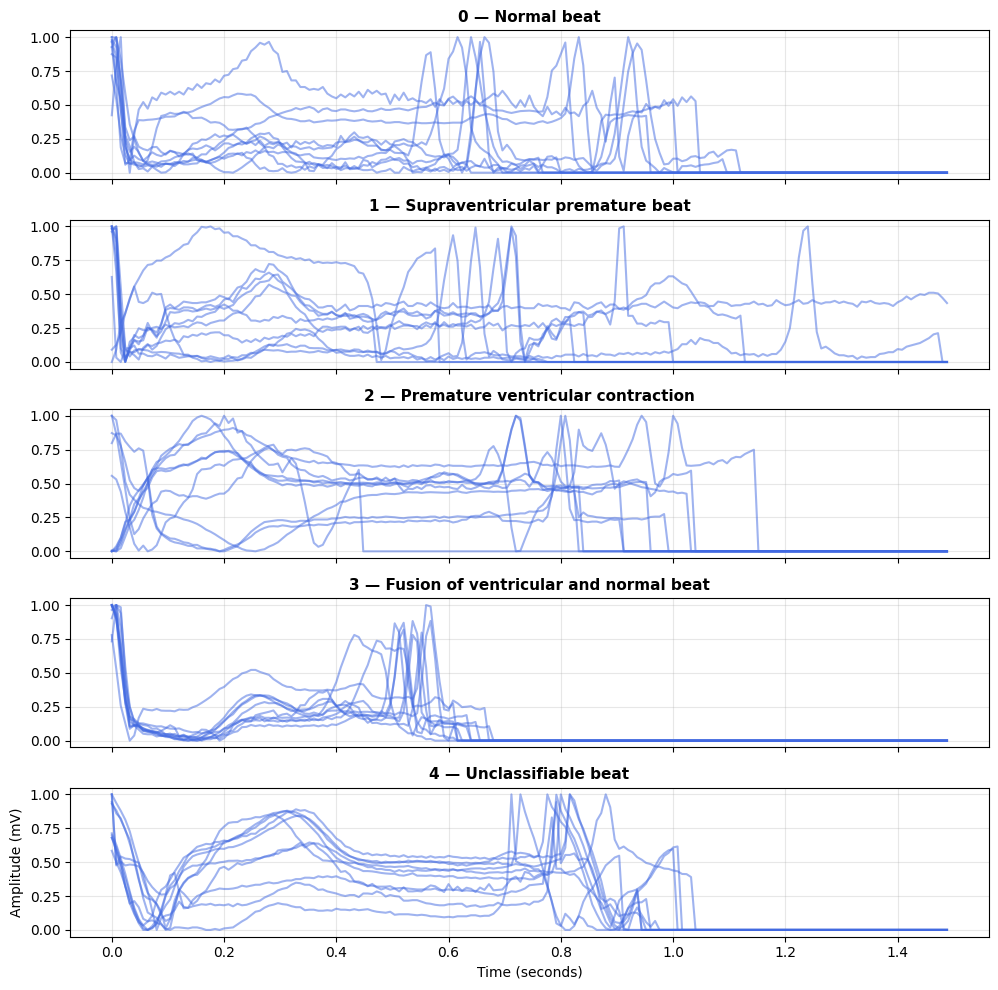

In [100]:
import matplotlib.pyplot as plt
import numpy as np

classes = {
    0: "Normal beat",
    1: "Supraventricular premature beat",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal beat",
    4: "Unclassifiable beat"
}

def plot_ecg_recordings(x_data, y_data, class_names=classes, plots_per_class=10, fs=125):
    n_classes = len(class_names)
    n_samples = x_data.shape[1]

    # Time axis
    t = np.arange(n_samples) / fs  # in seconds

    fig, ax = plt.subplots(n_classes, sharex=True, sharey=True, figsize=(10, 10))

    for i in range(n_classes):
        class_label = i
        class_name = class_names[class_label]
        subset = x_data[y_data == class_label]

        for j in range(min(plots_per_class, len(subset))):
            ax[i].plot(t, subset.iloc[j, :], color="royalblue", alpha=0.5)

        ax[i].set_title(f"{class_label} — {class_name}", fontsize=11, fontweight='bold')
        ax[i].grid(True, alpha=0.3)

    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude (mV)")
    plt.tight_layout()
    plt.show()

plot_ecg_recordings(X_train, y_train)

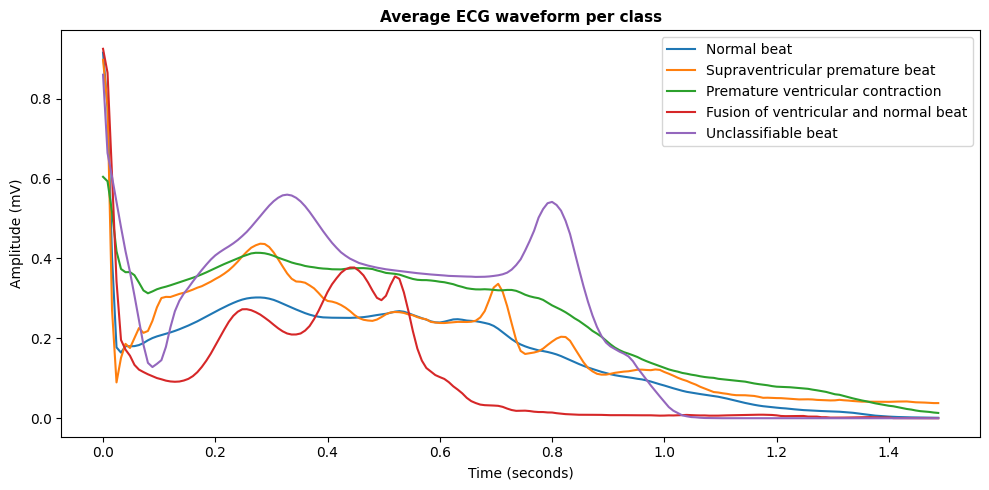

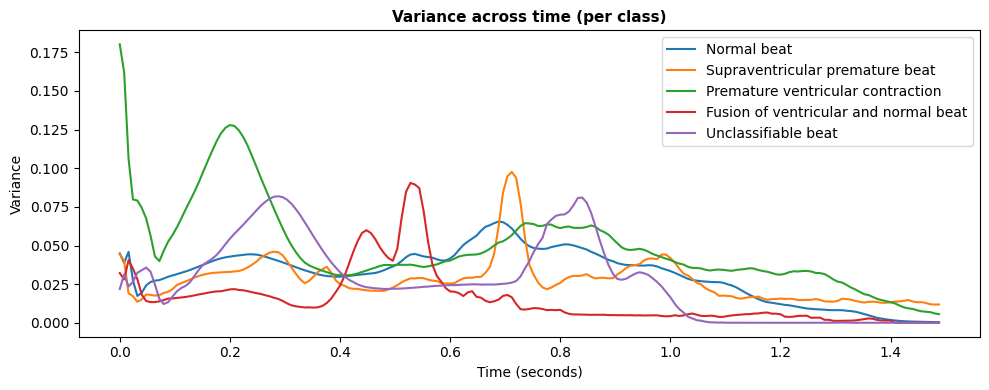

In [124]:
# Mean waveform per label
fs = 125
t = np.arange(X_train.shape[1]) / fs

plt.figure(figsize=(10, 5))
for i in range(5):
    mean_wave = X_train[y_train == i].mean(axis=0)
    plt.plot(t, mean_wave, label=classes[i])
plt.title("Average ECG waveform per class", fontsize=11, fontweight='bold')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude (mV)")
plt.legend()
plt.tight_layout()
plt.show()


# Variance per sample
plt.figure(figsize=(10, 4))
for i in range(5):
    var_wave = X_train[y_train == i].var(axis=0)
    plt.plot(t, var_wave, label=classes[i])
plt.title("Variance across time (per class)", fontsize=11, fontweight='bold')
plt.xlabel("Time (seconds)")
plt.ylabel("Variance")
plt.legend()
plt.tight_layout()
plt.show()

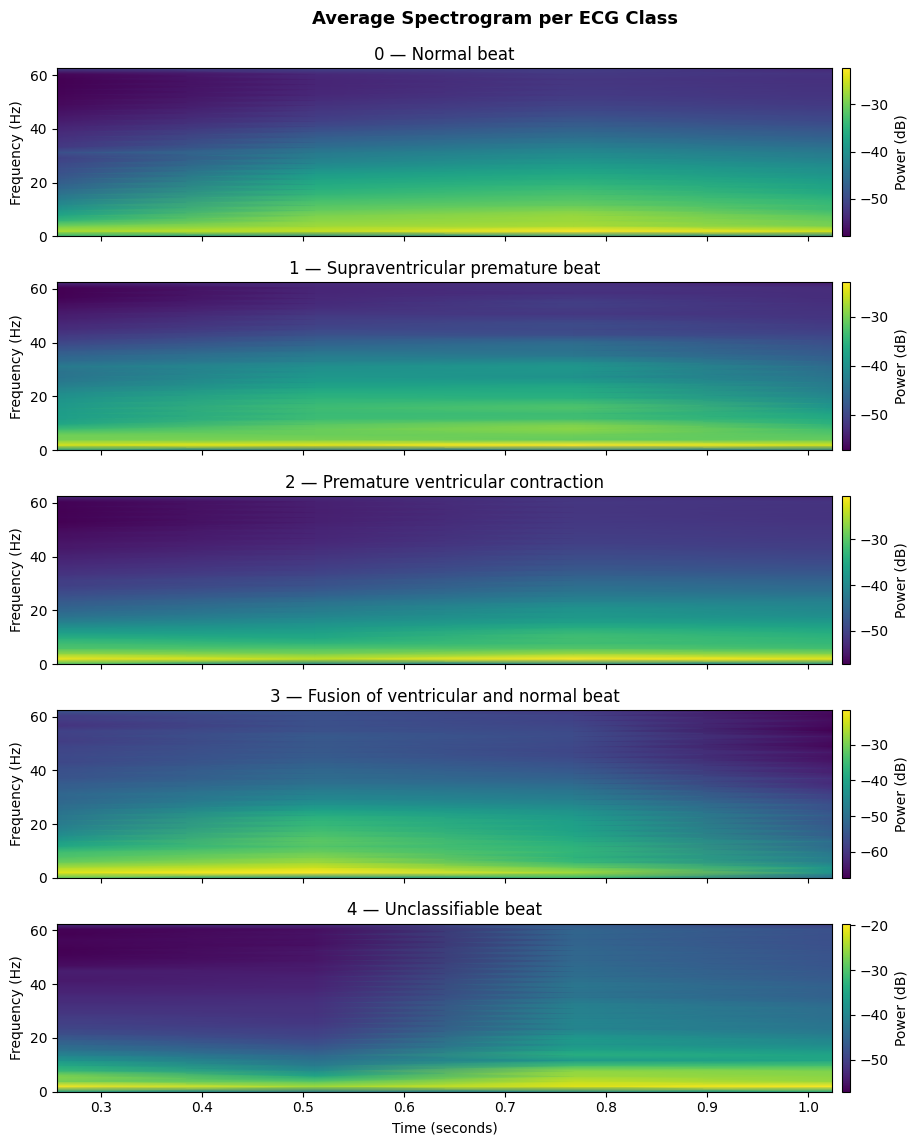

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

fs = 125  # Sampling rate (Hz)
nperseg = 64   # frame size (samples)
noverlap = 32  # overlap size (samples)

fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)
plt.subplots_adjust(hspace=0.4)

for i, ax in enumerate(axes):
    subset = X_train[y_train == i].values

    # Mean spectrogram per label
    spec_list = []
    for sig in subset:
        f, t, Sxx = spectrogram(sig, fs=fs, nperseg=nperseg, noverlap=noverlap)
        spec_list.append(Sxx)
    mean_spec = np.mean(spec_list, axis=0)

    # Linear to dB
    Sxx_dB = 10 * np.log10(mean_spec + 1e-10)
    im = ax.pcolormesh(t, f, Sxx_dB, shading='gouraud', cmap='viridis')
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(f"{i} — {classes[i]}")
    ax.set_ylim(0, fs/2) # frequencies in range 0-62.5 Hz
    fig.colorbar(im, ax=ax, label="Power (dB)", pad=0.01)

axes[-1].set_xlabel("Time (seconds)")
plt.suptitle("Average Spectrogram per ECG Class", fontsize=13, fontweight='bold', y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Calculate some descriptive statistics from the recordings

In [103]:
# ============================================
# 🩺 Exploratory Data Analysis for ECG signals
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, entropy, f_oneway
from scipy.signal import welch
from sklearn.decomposition import PCA

# Descriptive statistical features
def extract_features(X, y):
    feats = []
    for i in range(len(X)):
        sig = X[i, :]
        features = {
            "mean": np.mean(sig),
            "std": np.std(sig),
            "max": np.max(sig),
            "min": np.min(sig),
            "range": np.ptp(sig),
            "skew": skew(sig),
            "kurtosis": kurtosis(sig),
            "energy": np.sum(sig**2),
            "entropy": entropy(np.abs(sig) + 1e-8)
        }
        feats.append(features)
    df = pd.DataFrame(feats)
    df["label"] = y.values if isinstance(y, pd.Series) else y
    return df

features = extract_features(X_train.values, y_train)
features.head()

,mean,std,max,min,range,skew,kurtosis,energy,entropy,label
0,0.098419,0.176073,1.0,0.0,1.0,3.546201,13.625459,7.608654,4.220371,0
1,0.090010,0.159722,1.0,0.0,1.0,3.835006,16.261444,6.285631,4.328842,0
2,0.062104,0.138769,1.0,0.0,1.0,4.324592,22.166909,4.322286,3.935333,0
3,0.084084,0.160821,1.0,0.0,1.0,3.477492,13.691750,6.158557,4.086485,0
4,0.116567,0.186151,1.0,0.0,1.0,3.109726,10.238896,9.020939,4.395137,0


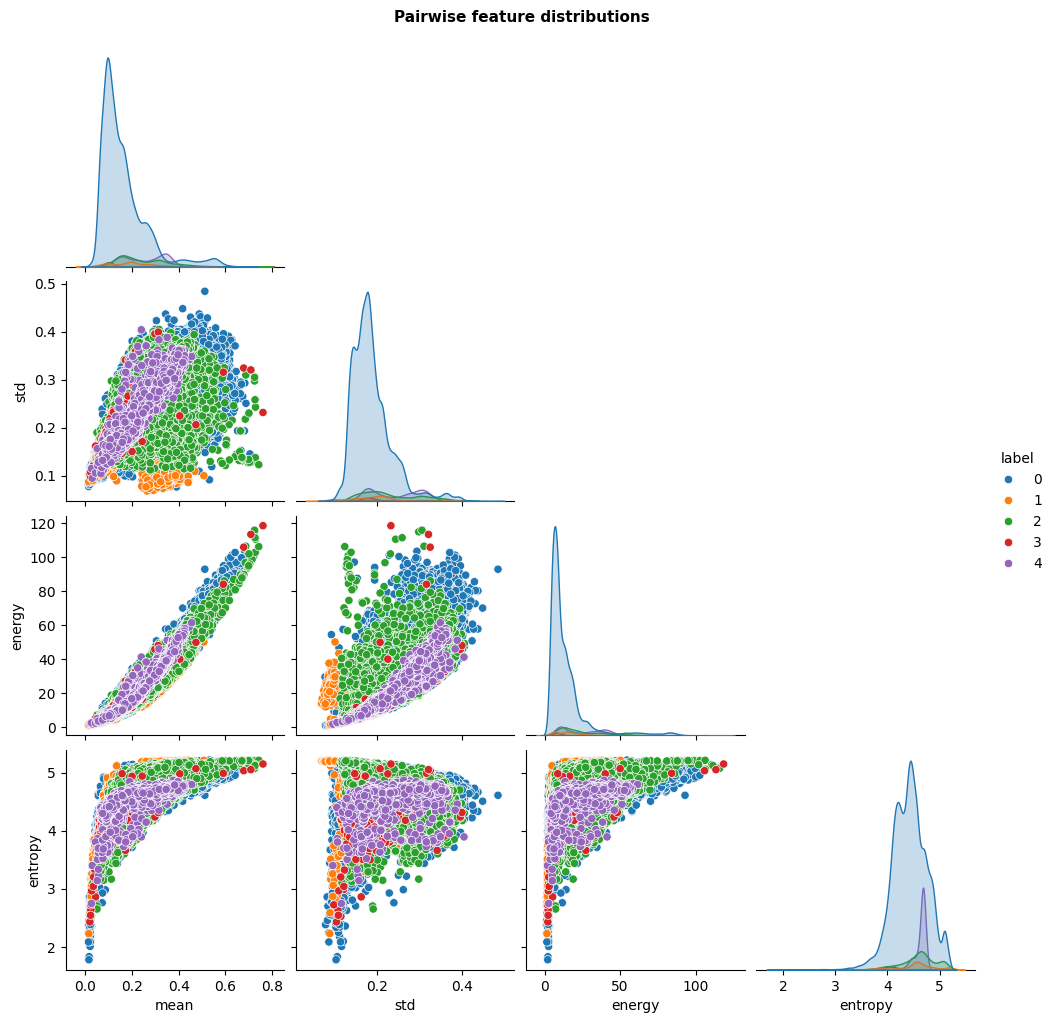

In [117]:
sns.pairplot(
    features,
    vars=["mean", "std", "energy", "entropy"],
    hue="label",
    palette="tab10",
    diag_kind="kde",
    corner=True
)
plt.suptitle("Pairwise feature distributions", y=1.02, fontsize=11, fontweight='bold')
plt.show()

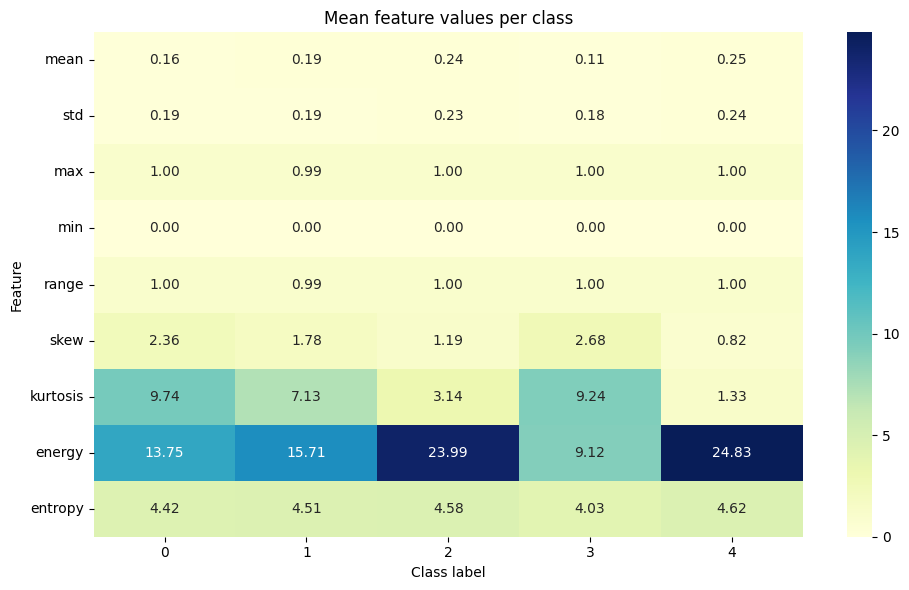

In [115]:
summary = features.groupby("label").mean().T
plt.figure(figsize=(10, 6))
sns.heatmap(summary, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mean feature values per class")
plt.ylabel("Feature")
plt.xlabel("Class label")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3140377434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=features, x="label", y="energy", palette="Set2")


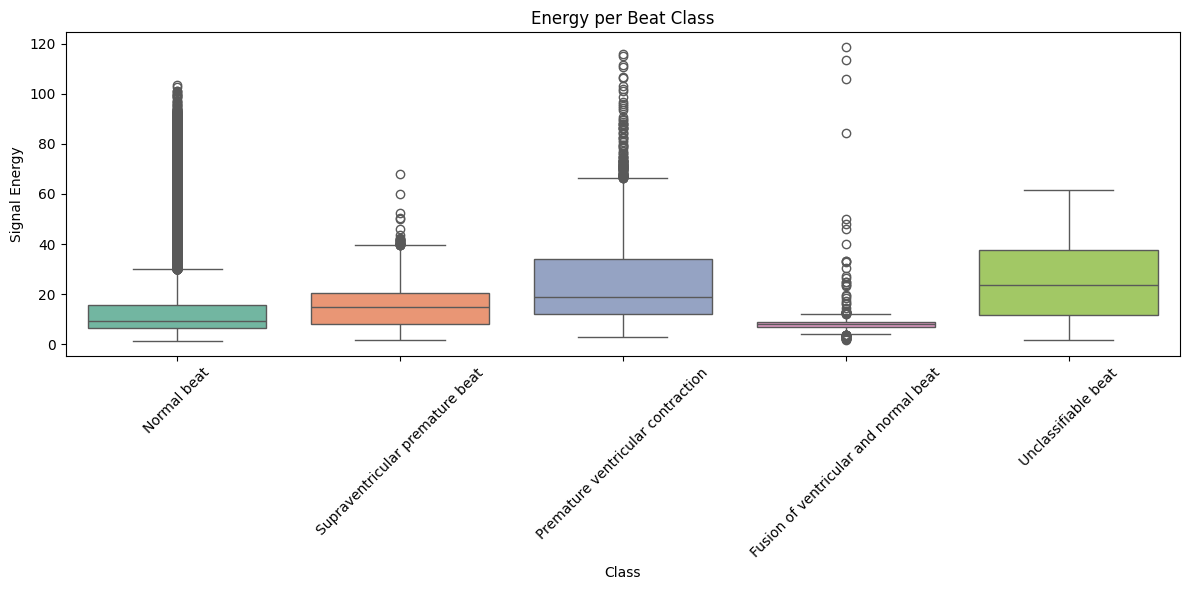

In [102]:
plt.figure(figsize=(12,6))
sns.boxplot(data=features, x="label", y="energy", palette="Set2")
plt.title("Energy per Beat Class")
plt.xlabel("Class")
plt.ylabel("Signal Energy")
plt.xticks(ticks=range(5), labels=[classes[i] for i in range(5)], rotation=45)
plt.tight_layout()
plt.show()


Plot label distribution in training set

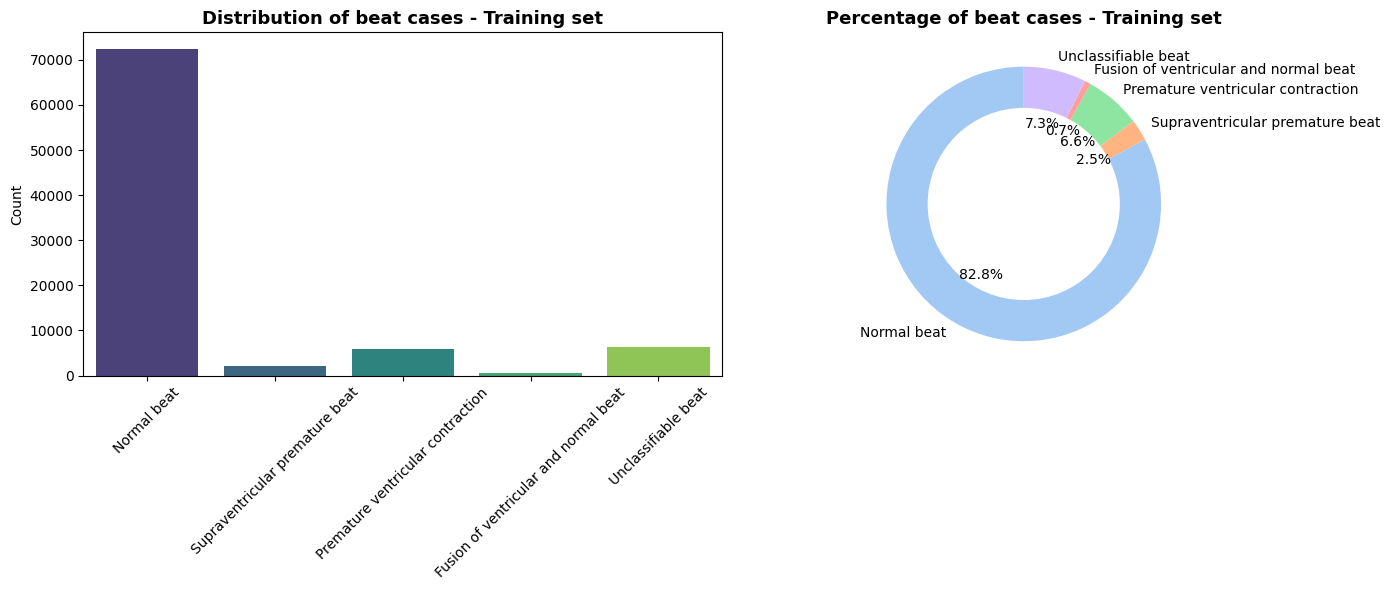

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

y_train = y_train.astype(int)
num_of_values = y_train.value_counts().sort_index()

data_for_plot = pd.DataFrame({
    'Label': [classes[i] for i in num_of_values.index],
    'Count': num_of_values.values
})

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(
    data=data_for_plot,
    x='Label',
    y='Count',
    hue='Label',
    palette='viridis',
    dodge=False,
    ax=axes[0]
)
axes[0].set_title("Distribution of beat cases - Training set", fontsize=13, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")
axes[0].legend([],[], frameon=False)
axes[0].tick_params(axis='x', rotation=45)

axes[1].set_title("Percentage of beat cases - Training set", fontsize=13, fontweight='bold')
colors = sns.color_palette('pastel', len(num_of_values))
wedges, texts, autotexts = axes[1].pie(
    num_of_values.values,
    labels=[classes[i] for i in num_of_values.index],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)

centre_circle = plt.Circle((0, 0), 0.7, fc='white')
axes[1].add_artist(centre_circle)

plt.tight_layout()
plt.show()

Handle data imbalance by resampling

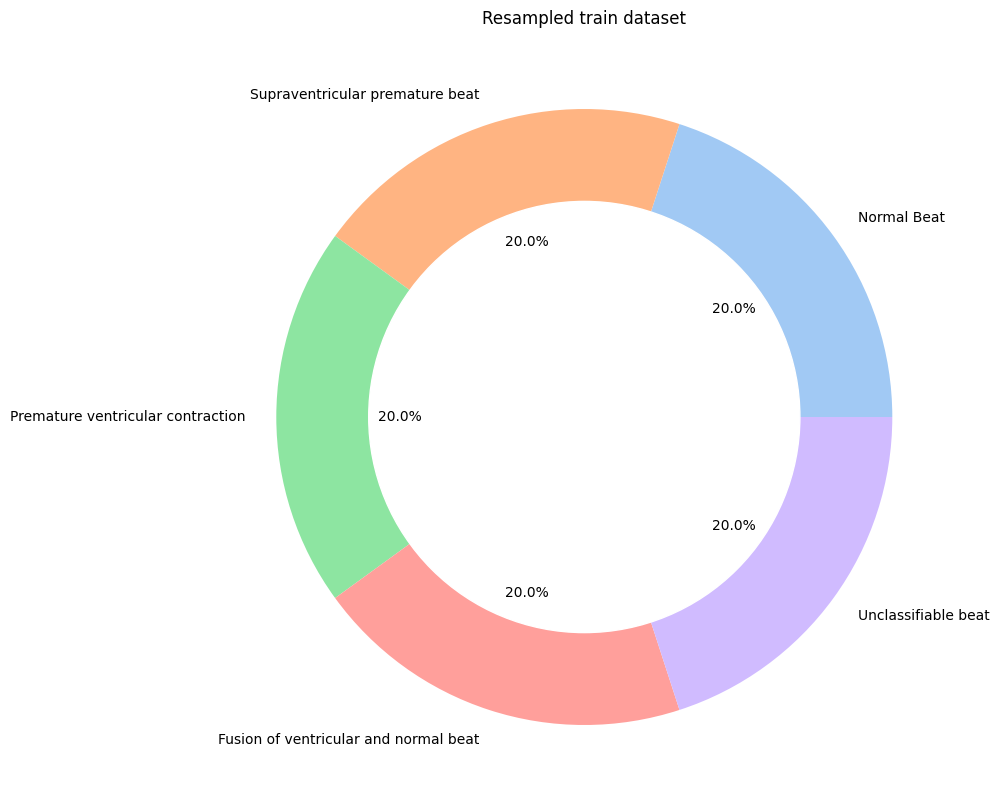

In [78]:
from sklearn.utils import resample

df_1 = train[train[187] == 1]
df_2 = train[train[187] == 2]
df_3 = train[train[187] == 3]
df_4 = train[train[187] == 4]

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)
df_0 = train[train[187]==0].sample(n =20000, random_state=123)
train_resampled = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

num_of_values = train_resampled[187].value_counts()
data_for_plot = pd.DataFrame({'Label': labels, 'Count': num_of_values.values})

plt.figure(figsize=(20,10))
plt.title("Resampled training set")
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(num_of_values.values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [80]:
X_train = train_resampled.iloc[:, :-1].values
y_train = train_resampled.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

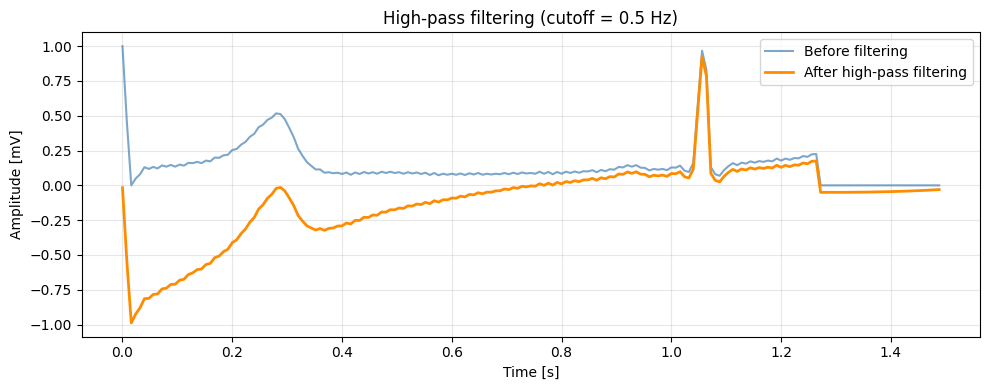

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# High-pass Butterworth filter
def high_pass_filter(original_signal, cutoff_frequency=0.5, sampling_rate=125, order=3):
    """
    Applies a high-pass Butterworth filter to the input signal.

    Parameters:
    - original_signal (1D array): the input ECG signal
    - cutoff_frequency (float): cutoff frequency in Hz (default 0.5)
    - sampling_rate (float): sampling rate in Hz (default 125)
    - order (int): filter order (default 3)
    """
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='highpass', analog=False)
    filtered_signal = filtfilt(b, a, original_signal)
    return filtered_signal


# --- Παράδειγμα χρήσης με ένα beat από το X_train ---
fs = 125  # το dataset έχει sampling rate 125 Hz
beat_index = np.random.randint(0, len(X_train))  # τυχαίο δείγμα
original_signal = X_train.iloc[beat_index, :].values

# --- Εφαρμογή φίλτρου ---
filtered_signal = high_pass_filter(original_signal, cutoff_frequency=0.5, sampling_rate=fs)

# --- Δημιουργία χρονικού άξονα ---
t = np.arange(len(original_signal)) / fs  # χρόνος σε δευτερόλεπτα (~1.5 s)

# --- Οπτικοποίηση ---
plt.figure(figsize=(10, 4))
plt.plot(t, original_signal, label="Before filtering", color='steelblue', alpha=0.7)
plt.plot(t, filtered_signal, label="After high-pass filtering", color='darkorange', linewidth=2)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [mV]")
plt.title("High-pass filtering (cutoff = 0.5 Hz)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


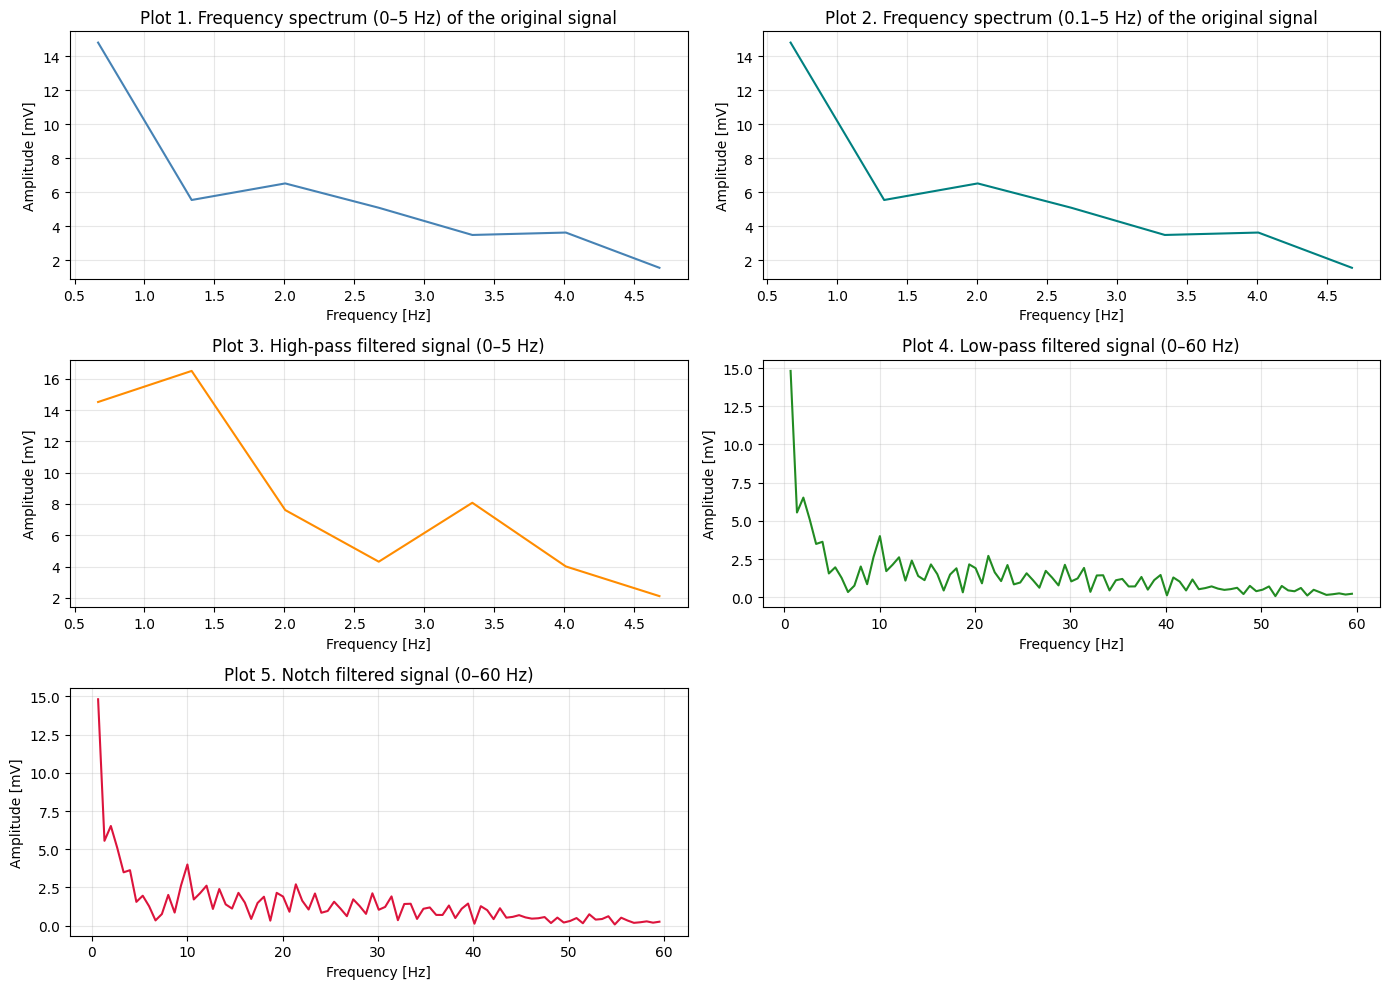

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import butter, filtfilt, iirnotch
from numpy.fft import fft, fftfreq

# ------------------------
# FFT Spectrum Function
# ------------------------
def get_frequency_spectrum(signal, freq_from, freq_to, sampling_rate=125):
    """
    Computes the frequency spectrum of a given signal using FFT
    and returns the amplitude of frequency components within a range.
    """
    fft_data = fft(signal)
    frequencies = fftfreq(len(signal), d=1/sampling_rate)

    # Keep only positive frequencies
    pos_mask = frequencies > 0
    frequencies = frequencies[pos_mask]
    fft_magnitude = np.abs(fft_data[pos_mask])

    # Filter to desired range
    freq_mask = (frequencies >= freq_from) & (frequencies <= freq_to)
    return frequencies[freq_mask], fft_magnitude[freq_mask]

# ------------------------
# Low-pass Butterworth Filter
# ------------------------
def low_pass_filter(original_signal, cutoff_freq=60, sampling_rate=125, order=3):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return filtfilt(b, a, original_signal)

# ------------------------
# Notch Filter (π.χ. 50 Hz)
# ------------------------
def notch_filter(signal, notch_frequency=50, quality_factor=30, sampling_rate=125):
    b, a = iirnotch(notch_frequency / (sampling_rate / 2), quality_factor)
    return filtfilt(b, a, signal)

# ------------------------
# Παράδειγμα εφαρμογής
# ------------------------
fs = 125
beat_index = np.random.randint(0, len(X_train))
original_signal = X_train.iloc[beat_index, :].values

# --- Εφαρμογή φίλτρων ---
filtered_high_pass_signal = high_pass_filter(original_signal, cutoff_frequency=0.5, sampling_rate=fs)
filtered_low_pass_signal  = low_pass_filter(original_signal, cutoff_freq=60, sampling_rate=fs)
filtered_notch_signal     = notch_filter(original_signal, notch_frequency=50, sampling_rate=fs)

# ------------------------
# Σχεδίαση φασμάτων
# ------------------------
plt.figure(figsize=(14, 10))

# 1️⃣ Original signal (0–5 Hz)
freqs, amps = get_frequency_spectrum(original_signal, 0, 5, fs)
plt.subplot(3, 2, 1)
plt.plot(freqs, amps, color="steelblue")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.title("Plot 1. Frequency spectrum (0–5 Hz) of the original signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [mV]")
plt.grid(True, alpha=0.3)

# 2️⃣ Original signal (0.1–5 Hz)
freqs, amps = get_frequency_spectrum(original_signal, 0.1, 5, fs)
plt.subplot(3, 2, 2)
plt.plot(freqs, amps, color="teal")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.title("Plot 2. Frequency spectrum (0.1–5 Hz) of the original signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [mV]")
plt.grid(True, alpha=0.3)

# 3️⃣ High-pass filtered signal
freqs, amps = get_frequency_spectrum(filtered_high_pass_signal, 0, 5, fs)
plt.subplot(3, 2, 3)
plt.plot(freqs, amps, color="darkorange")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.title("Plot 3. High-pass filtered signal (0–5 Hz)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [mV]")
plt.grid(True, alpha=0.3)

# 4️⃣ Low-pass filtered signal
freqs, amps = get_frequency_spectrum(filtered_low_pass_signal, 0, 60, fs)
plt.subplot(3, 2, 4)
plt.plot(freqs, amps, color="forestgreen")
plt.title("Plot 4. Low-pass filtered signal (0–60 Hz)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [mV]")
plt.grid(True, alpha=0.3)

# 5️⃣ Notch filtered signal
freqs, amps = get_frequency_spectrum(filtered_notch_signal, 0, 60, fs)
plt.subplot(3, 2, 5)
plt.plot(freqs, amps, color="crimson")
plt.title("Plot 5. Notch filtered signal (0–60 Hz)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [mV]")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
